# Project 3: Clustering
**Group 5:** Jeff Nguyen, William Hinton, Adam Ruthford  
**09AUG2020**

# Business Understanding
Small businesses form the backbone of the American economy. They are responsible for 49.2% of private sector employment and represent one third of U.S. exports(please see [SBA FAQ](https://www.sba.gov/sites/default/files/FAQ_Sept_2012.pdf)). One of the primary ways the government supports small businesses is through loan guarantees. The data set examined in this paper contains historical information about loans guaranteed by the Small Business Administration or SBA. To be clear, the SBA does not loan money instead it guarantees a portion of the loans made by private banks. This paper uses a data set provided on the Kaggle website. Included with the dataset is a detailed breakdown of the dataset that is referenced within this paper, please see the following link([Kaggle: Should this loan be approved or denied](https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied))
  
This paper will discuss using the dataset to answer questions about SBA guaranteed loans that failed. The “MIS_Status” column indicates whether the loan was paid off in full or some portion of it had to be charged off as unrecoverable. The purpose of the paper is to identify common clusters in attributes amongst loans that failed. Both continuous as well as categorical variables will be examined for clusters. In this paper the dataset is filtered to only examine loans that were marked “CHGOFF”.

Measuring the impact of clusters on the failure of loans will take several forms. Clustered categorical data will be examined by comparing the proportion of loans that fall into identified clusters for failed loans. These proportions can be compared to the proportions for all loans. Through clustering the categorical variables, we seek to expand our exploratory data analysis. As such we do not expect this portion of the report to yield objective measures. Instead we hope to discover if certain combinations of variables have disproportionate ratios of failed or successful loans. This can be used to drive further analysis.

Agglomerative clustering will also be performed using a mixture of one-hot-encoded categorical features and several continuous features.  This clustering approach serves as an alternative, or supplemental model, that can cluster loans that have charged-off.  The intent of clustering these loans is to determine the characteristics of loans that fail such as: median term, region, or business sector and use this information to prevent loan failures.

The data set does not contain clearly defined clusters. Fortunately, the business case does not require identification of missing categories, or to pick out groupings of failed loans from all failed loans. Since there are no natural clusters in the data set, clustering is used as an EDA tool to further our understanding of the data. Thus, it is not used to find specific results but instead to uncover previously unidentified nuggets of information. As an example, in this report we learn that low document loans have a lower failure rate than loans in general. Thus, affirming that the selection criteria used to allow low document loan applications works.

Rand index or explanatory data analysis can be used to judge model effectiveness.  For this data we determined explanatory data analysis of the clusters generated by each clustering algorithm to evaluate model effectiveness and to provide insights based on the common attributes shared by the members of a cluster.  Utilizing this method makes it easy to share common traits present within a cluster such as the median term, or SBA approval amount.

With the recent COVID-19 crisis and the resulting economic downturn revitalizing and supporting small businesses becomes more important than probably any other time since the founding of the SBA in 1953. Being able to able to find common characteristics of failed loans is vitally important at this time due to the already unprecedented level of loans being guaranteed by the SBA.  Additionally utilizing the insights from the clustering can help loan grantors in making correct decisions.

# Data Understanding 1

Initial data cleaning and preparation code was derived from **Project 1**, where data types and null values were addressed.  Data were first imported into a pandas dataframe, followed by each feature getting set to the appropriate data type based on data dictionary definitions.  For example, features that have currencies are set to the float data type as they are a continuous feature; whereas features like **NewExist** is categorical in nature and set to the object data type.

In [68]:
#Import data manipulation, vizulization, and ML Packages
import pandas as pd
import time
#load data into pandas dataframe
loans = pd.read_csv('C:/Users/Jeff/Desktop/ML1/SBAnational.csv')
#loans = pd.read_csv('C:\Data\DS7331\Project\should-this-loan-be-approved-or-denied/SBAnational.csv')

C:\Users\Jeff\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


A detailed explanation for each variable follows.

**LoanNr_ChkDgt:**  Defined as an integer. This number represent a primary key that distinguishes one loan from another. The number itself is not useful for predictive purposes. However, it can be checked to ensure the dataset does not have duplicates.  

**Name:** The name of the entity receiving a loan. Defined in the data set as an object/string. As is this data would be of little use. Derived variable could be made from this column such. For instance, from the examples above all records with "DDS" could be obtained and questions could be answered about how loans to dentist performance.  
  
**City, State, Zip:** Standard geographic information fields for the loan recipient define as object/string for City and State and int for zip code. Data can be broken down by any of these columns to see if regional differences play a part in loan performance.  
  
**Bank:** The name of the bank presented as an object/string. Could be used to detail bank specific performance with respect to loan performance. Allows us to ask and answer questions like "Which bank has the worst performing loan portfolio?"

**BankState:** This column is presented as an object/string. The state the bank making the loan is located in. All references to "Bank" probably need to include the "BankState" to ensure different banks are not mixed.  
  
**NAICS:** The column is presented as an integer. "NAICS" stands for "North American Industry Classification System". This code consists of six digits, the first two digits are used to indicate the industry sector the company receiving the loan is in. The other digits in the code further identify which subsector, industry group, NAICS industry, and national industry the company receiving the loan belongs to. This will allow detailed information to be obtained on loan performance by sector. However, even the small sampling of data above reveals that missing data in the form of "0"s exist for some records and some method of accounting for the missing data will need to be devised. The following website was used in researching the [NAISC codes](https://www.naics.com/).  
  
**ApprovalDate and ApprovalFY:** These columns are presented as an object/string. The date and fiscal year the loan was approved by the SBA. Performance can be grouped by year and date, as necessary.  
  
**Term:** The column is presented as an integer. This is the loan term in months. This column can be used as a continuous variable as well as being binned and used as an ordered categorical variable, "short term", "long term" loans as an example.

**NoEmp:** The column is presented as an integer. The column contains the number of employees in the business. This column can be used as a continuous variable as well as being binned and used as an ordered categorical variable, "sole proprietorship", "under 5 employees", "between 5 and 20 employees", and "over 20 employees" as an example.

**NewExist:** The column is presented as a integer. This categorical variable indicates whether the business receiving the loan is a new or existing business. This column will need to be recoded in our dataset.

**CreateJob and RetainedJob:** These columns are presented as an integer. The column records the number of jobs created or retained respectively. These variables cannot be used as explanatory variables as they indicate the success of the loan. They are a proxy for loan  success. However, these variables can be used as the response variable in a model that would attempt to maximize job creation and or retention.

**FranchiseCode:** The column is presented as an integer. The column will need to be recast to a category. Values that have "0" or "1" indicate that the small business is not a franchise. Other values indicate the business is a franchise.

**UrbanRural:** The column is presented as an integer. The column will need to be recast to a category. The data in this column is categorical with "Urban" being a 1, "Rural" being a "2", and "0" representing "undefined".

**RevLineCr:** This column is presented as an object/string. The column indicates whether the loan is available as a revolving line of credit. The primary responses are "Y" and "N" although it appears that other values exist.

**LowDoc:** This column is presented as an object/string. The column indicates whether the loan was obtained using a one page "low document" application. The primary responses are "Y" and "N".

**ChgOffDate:** This column is presented as an object/string. As expected, many of the values in this column are "NaN". The column contains the date the loan was written off as uncollectable. Successful loans would have the value of "NaN".

**DisbursementDate:** This column is presented as an object/string. The column has the date the loan money was disbursed to the small business.

**DisbursementGross:** This column is presented as an object/string. The column needs to be converted to a numeric. The gross amount of money loaned to the small business.

**BalanceGross:** This column is presented as an object/string. The column needs to be converted to a numeric. The column contains the remaining balance of the loan.

**MIS_Status:** This column is presented as an object/string. The column is categorical data with values "P I F" and "CHGOFF". This column is the main response column of the dataset.

**ChgOffPrinGr:** This column is presented as an object/string. The column needs to be converted to a numeric. The total amount for failed loans that was non recoverable.

**GrAppv:** This column is presented as an object/string. The column needs to be converted to a numeric. The total amount approved for the loan.

**SBA_Appv:** This column is presented as an object/string. The column needs to be converted to a numeric. This column contains the total amount approved and guaranteed by the SBA.


In [69]:
#Create table containing information about features, data types, formats, and descriptions
loan_info = pd.DataFrame(columns=['Feature Name', 'Data type', 'Count','Preferred Format', 'Description'])
loan_info['Feature Name']=list(loans.columns.values) 
loan_info['Data type']= list(loans.dtypes)

loan_info['Count'] = loans.shape[0]
loan_info['Description']= ['Primary Key', ' Borrower name', 'Borrower city', 'Borrower state', 'Borrower zip code',
                        'Bank name', 'Bank state', 'NAICS Classification code','Date SBA commitment issued',
                        'Fiscal year of commitment','Loan term - months', 'Business employee count', 
                        'Existing=1 or New=2 business','Number of Jobs Created','Number of jobs retained','Franchise code',
                        'Urban=1, Rural =2, undefined = 0','Revolving line of credit: Y/N','LowDoc Loan Program: Y/N',
                        'Loan default date','Disbursement date','Disbursed armount','Gross amount outstanding',
                        'loans status','Charged-off amount','Gross amount approved by bank','SBA guaranteed amount of approved loan']

loan_info['Preferred Format'] = ['Number','Text','Text','Text','Number','Text','Text','Number','Date/Time','Text','Number','Number',
                           'Number','Number','Number','Number','Number','Text','Text','Date/Time','Date/Time','Currency',
                           'Currency','Text','Currency','Currency','Currency']                                  

#Start Table Index at 1 instead of 0
loan_info.index = loan_info.index + 1
loan_info

,Feature Name,Data type,Count,Preferred Format,Description
1,LoanNr_ChkDgt,int64,899164,Number,Primary Key
2,Name,object,899164,Text,Borrower name
3,City,object,899164,Text,Borrower city
4,State,object,899164,Text,Borrower state
5,Zip,int64,899164,Number,Borrower zip code
6,Bank,object,899164,Text,Bank name
7,BankState,object,899164,Text,Bank state
8,NAICS,int64,899164,Number,NAICS Classification code
9,ApprovalDate,object,899164,Date/Time,Date SBA commitment issued
10,ApprovalFY,object,899164,Text,Fiscal year of commitment


The table shows that this data is acceptable for use in this project as there are more than 10 features, it has over 30,000 records, and has a mix of continuous and categorical variables.

We can see that there are discrepancies between data type and preferred format.  The preferred format is the format a feature should take given if it categorical, nominal, ordinal, interval, or ratio data.  Integer and float data types should correspond to nominal, ordinal, interval, and ratio data.  While categorical data should correspond string if it is text in nature or integer if the data has several levels or is dummy coded.  Feature data types, along with missing values, duplicate data, and outliers will be address in the Data Quality section.

## Data Quality

Before addressing missing values, duplicate data and outliers, several feature data types from the raw data are not in the desired format for use.  Several features contain continuous data or date data are coded as strings and need to be converted to the apporpriate data type to allow for proper ingestion when modeling is performed.

**DisbursementGross**, **BalanceGross**, **ChgOffPrinGr**, **GrAppv**, **SBA_Appv** are features that deal with currency and are coded as strings which include '$' and ',' characters. Used this website for help with [converting currency to float.](
https://stackoverflow.com/questions/32464280/converting-currency-with-to-numbers-in-python-pandas)
  To treat these features as continuous data the special characters were removed, and the data was converted to the float data type.  This will allow for the data to be used by methods that utilize continous data.  **ApprovalDate**, **ChgOffDate**, and **DisbursementDate** are features that contain dates and were converted to the date/time data type.  This will be usefull for potential time series analysis.  **NewExist** is a categorical feature but has a float data type.  This feature was converted to an integer data type since float is better suited for continuous data.  **Zip**, **NAICS**, **FranchiseCode** are nominal features, but will be converted to strings for ease of manipulation and data cleaning.


In [70]:
import numpy as np

# Create lists of features that need their data types converted
currency = ['DisbursementGross','BalanceGross','ChgOffPrinGr','GrAppv','SBA_Appv']
date = ['ApprovalDate','ChgOffDate','DisbursementDate']
cat_variables = ['Zip']

# Convert features to appropriate data types
loans[currency] = loans[currency].replace('[\$,]', '', regex=True).astype(float)
loans[date]= loans[date].astype(np.datetime64)
loans['NewExist'] = loans['NewExist'].astype('Int64')
loans[cat_variables] = loans[cat_variables].astype(str)

In [71]:
# code gives list of columns and count of nulls and uniques values
LoanCol = pd.Series(loans.columns)
LoanCountDF = loans[LoanCol].agg(['count', 'size', 'nunique']).T
LoanCountDF['Null_Record_Count'] = LoanCountDF['size'] - LoanCountDF['count']
LoanCountDF['Number_of_Unique_Values'] = LoanCountDF['nunique']
LoanCountDF = LoanCountDF.loc[:,['Null_Record_Count','Number_of_Unique_Values']]
LoanCountDF

,Null_Record_Count,Number_of_Unique_Values
LoanNr_ChkDgt,0,899164
Name,14,779583
City,30,32581
State,14,51
Zip,0,33611
Bank,1559,5802
BankState,1566,56
NAICS,0,1312
ApprovalDate,0,9859
ApprovalFY,0,70


Names for 14 applications found in **Name** are not contained in the dataset and cannot be filled without identifying the loan applicant.  Since there are 14 rows with missing values they will be removed since they will not significantly impact the data. If unique identification of records is required **'LoanNr_ChkDgt'** values can be used to uniquely identify each row since it serves as a primary key.

**City** and **State** null values were addressed, and the methodology can be seen at the end of this section.

**Bank** contain 1559 null records and **BankState** contained 1566 missing records. It was difficult to identify a bank's state if the name of the bank is not recorded, and difficult to identify the bank's name regardless of other the other features as it must be entered at the time of application.  For these features null values were replaced as "Not Listed".

136 records were null for the **NewExist** feature.  These records were replaced with 0 to match the data type of integer for the feature and indicate that no values were entered for that particular record.

**RevLineCr** and **LowDoc** are both nominal categorical records with 4528 and 2582 missing records respectively. Missing values were replaced with "Not Provided".

**ChgoffDate** contained 736465 null values which indicates that the loan did not default.  Because this features data type is date/time were changed to '0000-00-00' to indicate that the loan is **not** in default.

The 2368 null values for **DisbursementDate** suggest that loan capital was not disbursed.  Records that did not have a disbursement date were assigned "0000-00-00" to indicate that there is no disbursement date associated with the record.

Addressing 1997 null records for **MIS_Status** was unique in that it was dependent on several attributes in the dataset. There were four different combinations of code used to address the null records for this feature.  The first combination identified null values that had a non-null value in the **ChgOffDate** feature and that the **ChgOffPrinGr** feature was not equal to zero; this combination of conditional requirements identified records that defaulted and had a charge off balance and renamed the null values as "CHGOFF".  The second combination identified null values where **DisbursementDate** was not null and the **BalanceGross** was equal to zero; this combination of features identifies records that did not receive funds and do not have a balance, this labeled the null values as "P I F".  The third and fourth combination identify null MIS_Status records where funds were not disbursed by checking **DisbursementGross** and **BalanceGross** features.  If the **DisbursementGross**was zero or null and the **BalanceGross** was 0, the missing data was labels as "Not Disbursed".

Several null values were also present in the City and State features. City contained 14 null values and State contained 30 null values. Both features describe the loan applicant's address information. For City null values, zip codes from the Zip feature and the United States Postal Service Zip Code Lookup tool (https://tools.usps.com/zip-code-lookup.htm?citybyzipcode) were used to identify the correct city or state name. Two zip-codes in City feature and two zip-codes in the State feature did not return a city in the United States and were left as 'NaN'. Since there are only 4 rows of data that do not have proper city or state data, they will be kept or removed depending on the machine learning algorithm used.

In [72]:
# Replace City NA with appropriate state/city name
cityList = ['Salt Lake City','New Orleans','Chicago','Chicago','San Diego','San Diego','San Diego','San Diego',
            'San Diego','San Diego','Clevland','St. Louis','St. Louis','St. Louis','St. Louis','St. Louis',
            'St. Louis','Seattle','Des Moines','San Antonio','Kansas City','Kansas City','Quincy','Quincy','Boston',
            'NaN','NaN','Louisville','Wilmington','Flint']
stateList = ['NaN','NaN','CA','AP','KS','TX','FL','WI','NJ','UT','MO','TX','TX','TX']

#Replace Cities with NAs with appropriate City or State    
loans.loc[loans.City.isnull(),'City'] = cityList
loans.loc[loans.State.isnull(),'State'] = stateList

A new feature called **difference_in_days** was created by subtracting DisbursementDate minus ApprovalDate.  This will explain the relationship between time the loan was approved to disbursement date. There may be some correlation to why a loan is defaulted on depending on disbursement date.

In [73]:
#Create new Time feature and convert to int
from datetime import datetime, timedelta
d1 = loans.DisbursementDate
d2 = loans.ApprovalDate
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%d-%m-%Y")
    d2 = datetime.strptime(d2, "%d-%m-%Y")
    return abs((d2 - d1).days)

difference_in_days = abs((d2-d1))/ timedelta(days=1)

loans['difference_in_days'] = difference_in_days

Addressing 1997 null records for MIS_Status was unique in that it was depedent on several attributes in the dataset. There were four different combinations of code used to address the null records for this feature. The first combination identified null values that had a non-null value in the ChgOffDate feature and that the ChgOffPrinGr feature was not equal to zero; this combination of conditional requirements identified records that defaulted and had a charge off balance and renamed the null values as "CHGOFF". The second combination identified null values where DisbursementDate was not null and the BalanceGross was equal to zero; this combination of features identifies records that did not receive funds and do not have a balance, this labeled the null values as "P I F". The third and fourth combination identify null MIS_Status records where funds were not disbursed by checking DisbursementGross and BalanceGross features. If the DisbursementGross was zero or null and the BalanceGross was 0, the missing data was labels as "Not Disbursed".

Each combination has a null count below the code to show how many of the 1997 null records remain.


In [74]:
loans['MIS_Status'].isnull().sum()

1997

In [75]:
#--------------------------------------------------------------------------------------------------------------------
#Fill In NaN fields
loans.dropna(subset = ['Name'], inplace = True)
loans["Bank"].fillna("Not Listed", inplace = True) 
loans["BankState"].fillna("Not Listed", inplace = True) 
loans['NewExist'].fillna(0, inplace = True)
loans['RevLineCr'].fillna("Not Provided", inplace = True)
loans['LowDoc'].fillna("Not Provided", inplace = True)


#Replace NaT MIS_status with CHGOFF if their ChgOffDate is not null
#If MIS_Status has value, 
loans['MIS_Status'].mask((loans['MIS_Status'].isnull()) & 
                         ((loans['ChgOffDate'].notnull()) |
                          (loans['ChgOffPrinGr']!=0.0)),'CHGOFF',inplace=True) 

loans['MIS_Status'].isnull().sum()

1736

In [76]:
loans['MIS_Status'].mask((loans['MIS_Status'].isnull()) &
                         (loans['DisbursementDate'].notnull()) & 
                         (loans['BalanceGross']==0.0),'P I F',inplace=True)

loans['MIS_Status'].isnull().sum()

117

In [77]:
loans['MIS_Status'].mask((loans['MIS_Status'].isnull()) &
                         (loans['DisbursementGross']==0.0) & 
                         (loans['BalanceGross']==0.0),'Not Disbursed',inplace=True)
print(loans['MIS_Status'].isnull().sum())

##Delete these records

36


In [78]:
loans.drop(loans[loans['MIS_Status'] == 'Not Disbursed'].index,inplace = True)
loans = loans.reset_index(drop=True) 
print(loans.shape)

(899069, 28)


In [79]:
loans['MIS_Status'].isnull().sum()
# delete these records instead

36

In [80]:
#--------------------------------------------------------------------------------------------------------------------
loans['MIS_Status'].replace(to_replace = 'P I F', value = 1, inplace = True)
loans['MIS_Status'].replace(to_replace = 'CHGOFF', value = 0, inplace = True)

After null values were removed, the index was reset for the loans data frame.  When rows are removed from a data frame, the index for that row remains.  If the indcies are not reset, null values will be assigned to indicies that had rows removed. Since sklearn algorithms require matricies and arrays, when a data frame with surplus incies are converted to a matrix, there will be a shape mismatch causing an error.  The .info() function was run to check on null values and the range index.

In [81]:
loans['ChgOffDate'].fillna("0000-00-00",inplace = True)
loans['DisbursementDate'].fillna("0000-00-00",inplace = True)
loans = loans.reset_index(drop=True) #resets index, important when converting to array

In [82]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899069 entries, 0 to 899068
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   LoanNr_ChkDgt       899069 non-null  int64         
 1   Name                899069 non-null  object        
 2   City                899069 non-null  object        
 3   State               899069 non-null  object        
 4   Zip                 899069 non-null  object        
 5   Bank                899069 non-null  object        
 6   BankState           899069 non-null  object        
 7   NAICS               899069 non-null  int64         
 8   ApprovalDate        899069 non-null  datetime64[ns]
 9   ApprovalFY          899069 non-null  object        
 10  Term                899069 non-null  int64         
 11  NoEmp               899069 non-null  int64         
 12  NewExist            899069 non-null  Int64         
 13  CreateJob           899069 no

### Outliers

Boxplots were used to visually identify the number of potential outliers for the continuous data in the **loans** dataframe.  The data was plotted without modification, and with values transformed using log10.  **DisbursementGross**, **BalanceGross**, **ChgOffPrinGr**, **GrAppv**, and **SBA_Appv** were plotted separately as the range of their data is much larger than **NoEmp**, **Term**, **CreateJob**, and **RetainedJob**.  Plotting these features together would have made it difficult to spot outliers since there are two groups of continuous data have vastly different ranges.  For the raw data seen in the 'Continuous Currency Features' plot a large volume of outliers are present as the amount of money considered and disbursed to a company is dependent on the small business' needs and their size.  For the 'Business Attribute Features' plot **NoEmp**, **CreateJob**, **RetainedJob** related to employees for each business and the variation and spread seen in the boxplots is dependent on the size and type of work each of the small businesses preform; due to this large spread there are also a large volume of outliers.  For **Term** the variation is much less as banks offer a limited variety of options for loan repayment, there are still several outliers as the small companies requesting longer loans may be a smaller company that prefers smaller loan payments. 

Text(0, 0.5, 'Loan Amount - $')

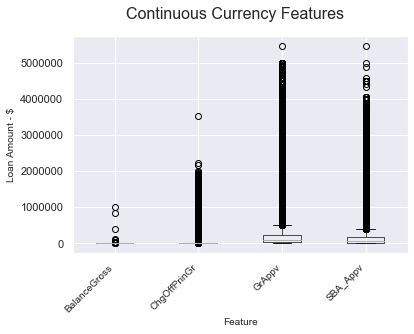

In [83]:
import matplotlib.pyplot as plt
#create matrix of continuous data
continuous_data2 = loans[['BalanceGross','ChgOffPrinGr','GrAppv','SBA_Appv']]
#plot the data
continuous_data2.boxplot()
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='medium')
plt.suptitle('Continuous Currency Features', fontsize=16)
plt.xlabel('Feature', fontsize=10)
plt.ylabel('Loan Amount - $', fontsize=10)

Text(0, 0.5, 'Count')

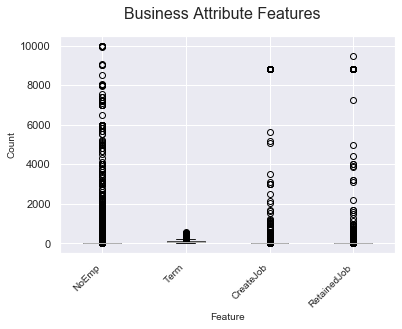

In [84]:
continuous_data1 = loans[['NoEmp','Term','CreateJob','RetainedJob']]
#plot the data
continuous_data1.boxplot()
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='medium')
plt.suptitle('Business Attribute Features', fontsize=16)
plt.xlabel('Feature', fontsize=10)
plt.ylabel('Count', fontsize=10)

After log10 transformation GrAppv and SBA_Appr feautre appear more symetric, however still contain outliers. BalanceGross and ChgOffPrinGr appear to be all outliers. ChgoffPrinGr 737139 and BalanceGross 899136 features contain values that captures the amount of loan that is owed when it has defaulted and the remaining balance of a loan. Both ChgoffPrinGr and BalanceGross have median values of 0, with 737139 and 899136 zero values, respectively. For these features if there are large values, and much of the data is zero valued, they will show as outliers.

For the 'Business Attribute Features': NoEmp, Term, CreateJobs, and RetainedJobs contain a large number of outliers in the tails. Converting heavily skewed features removes the normality requirement for required for some machine learning algorithms.


Text(0, 0.5, 'Loan Amount - $')

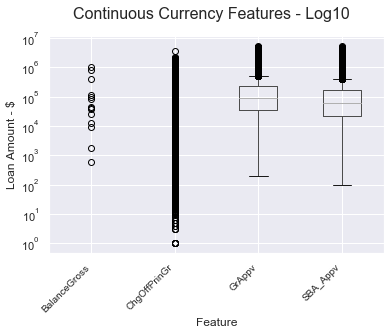

In [85]:
ax2 = continuous_data2.boxplot()
ax2.set_yscale('log')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='medium')
plt.suptitle('Continuous Currency Features - Log10', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Loan Amount - $', fontsize=12)

Text(0, 0.5, 'Count')

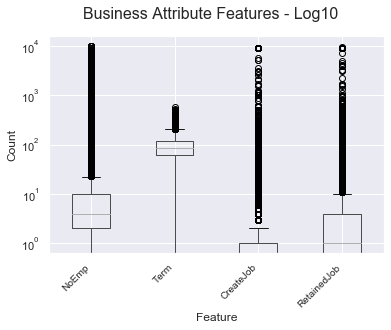

In [86]:
ax2 = continuous_data1.boxplot()
ax2.set_yscale('log')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='medium')
plt.suptitle('Business Attribute Features - Log10', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Count', fontsize=12)

Outliers will be left as is for the KModes and Agglomerative Clustering algorithms.  Since KModes clusters based on categorical features, outliers found in continuous features do not need to be addressed.  For Agglomerative clustering, the Ward method is a similarity measure that is more resistant to outliers and noise.  This is ideal as minimal modification to the data setneeds to be preformed in terms of outliers.

# Data Understanding 2

**MIS_Status:** This column is presented as an object/string. The column is categorical data with values "P I F" and "CHGOFF". This column is the main response column of the dataset.  This feature will be used to determine if a loan has succeeded or failed, where 'P I F' is a success, and a 'CHGOFF' is a failure.  Approximately 18% of loans were marked for a 'CHGOFF' and 82% successful repaid their loans.  This feature will serve as the response feature for our logistic and SVM models as it is dichotmous and indicates whether or not a loan applicant has paid their loan back or not.  **MIS_Status** will also be converted to numeric values instead of character for use in the model.

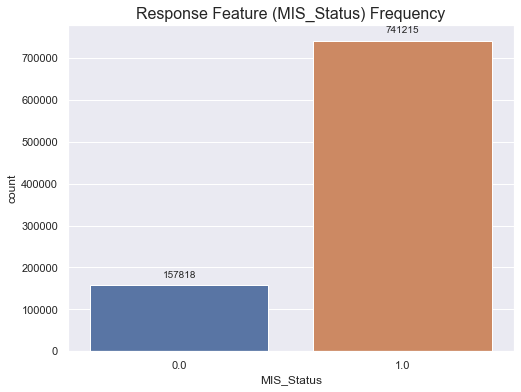

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.countplot(x =loans['MIS_Status'] )
plt.title("Response Feature (MIS_Status) Frequency",fontsize= 16)

for p in ax.patches:
    ax.annotate(p.get_height(),
                (p.get_x() + p.get_width() / 2, p.get_height()),  ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')

**DisbursmentGross**, **GRAppv**, and **SBA_Appv** are highly correlated (r > 0.90) with each other as they all describe the amount of money that is given to a loan applicant. **SBA_Appv** will be kept, while **DisbursementGross** and **GrAppv** will be removed as they are both like **SBA_Appv**, but do not represent the final loan amount an applicant will receive.  Please see the correlation matrix in the **Data Preparation** section for more details.

**Term** – this is a good indicator to determine if the loan will be defaulted due to the terms, some loans have short terms and most of them have long terms.

**FranchiseCode** keep – this indicates what type of businesses are requesting loans and which ones are likely to pay back the loan.    

### Feature Engineering

**NAICS**, **RevlineCr**, and **LowDoc** are features that require one-hot-encoding.  These features may require additional cleaning and may have many categories.  Consolidating the number of categories can assist with reducing overfitting and reduce the computational load it would take to find weights for the numerous levels that exist in some of the features.

#### Categorical Features

The North American Industry Classification System (**NAICS**) is used to classify a business into 19+ sectors that specialize in different services.  To reduce the number of levels, sectors were grouped based on similar attributes. The list of sectors can be viewed in the 'Data Dictionary' section of this link:https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied?select=SBAnational.csv 

Sectors were grouped by the first digit in their code as seen below:
- 1 Agriculture
- 2 Mining, Utilities, Construction
- 3 Manufacturing
- 4 Trade and Transportation
- 5 Professional and Scientific
- 6 Education and Health
- 7 Arts and Hospitality
- 8 other
- 9 Public Administration


In [88]:
# create NAICS bins for 0,1,2,3,4,5,6,7,8,9
'NAICS'
loans['NAICS'].replace(to_replace = 0, value = 800000, inplace = True)
loans['NAICS']= pd.cut(loans['NAICS'],
                       [100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000],
                       labels = ['1','2','3','4','5','6','7','8','9'])

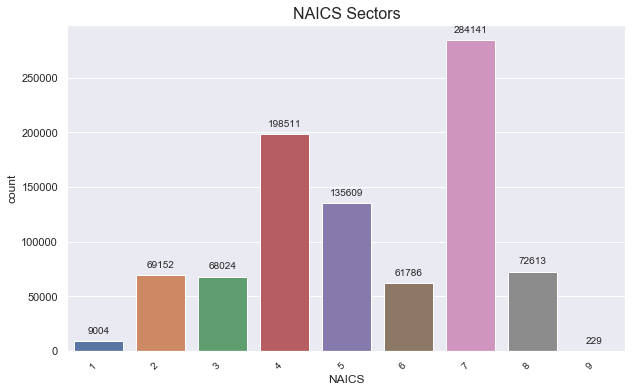

In [89]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x =loans['NAICS'] )
plt.title("NAICS Sectors",fontsize= 16)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='medium')

for p in ax.patches:
    ax.annotate(p.get_height(),
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')

**RevLineCr**, or Revolving Line of Credit should have values coded "Y" or "N".  We can see that there are 18 categories when there should be two.  All values coded "0" were converted to "N"; all values with "1" were coded to "Y", and all character values were coded as "N".  A plot below confirms that after cleaning that there are two classes.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

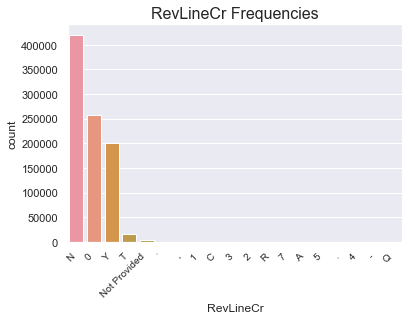

In [90]:
# RevLineCredit: delete special characters 14 total, recode numbers to letters
ax = sns.countplot(x =loans['RevLineCr'] )
plt.title("RevLineCr Frequencies",fontsize= 16)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='medium')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

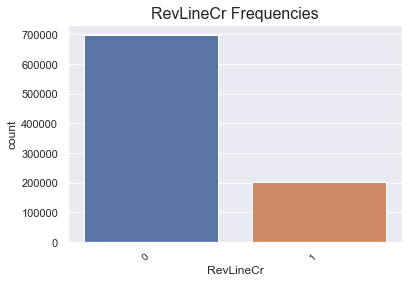

In [91]:
loans['RevLineCr'].replace(to_replace = ['Y','1'], value = 1, inplace = True)
loans['RevLineCr'].replace(to_replace = ['N','0'], value = 0, inplace = True)
no = ['T','`','Not Provided',",",'C','3','2','R','7','A','5','.','4',"'",'Q','-']
loans['RevLineCr'].replace(to_replace = no, value = 0, inplace = True)

ax = sns.countplot(x =loans['RevLineCr'] )
plt.title("RevLineCr Frequencies",fontsize= 16)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='medium')

**LowDoc** has 9 categories when it should have 3.  All values with "Y" will be coded as 1; values with "N" will be coded as 0; all other values will be coded as 0.  We can see that most loan applicants are not part of the LowDoc loan program in the barchart below.  After reorganization we can see that there are 2 categories with 0 being the largest with 788,817 records.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

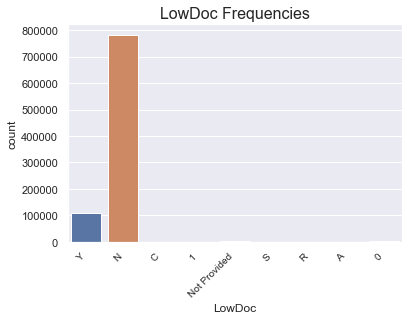

In [92]:
# LowDoc: covert everything to Y or N
ax = sns.countplot(x =loans['LowDoc'] )
plt.title("LowDoc Frequencies",fontsize= 16)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='medium')

In [93]:
loans['LowDoc'].replace(to_replace = ['Y','1'], value = 1, inplace = True)
loans['LowDoc'].replace(to_replace = ['N','0'], value = 0, inplace = True)
no = ['C','S','Not Provided','S','R','A']
loans['LowDoc'].replace(to_replace = no, value = 0, inplace = True)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

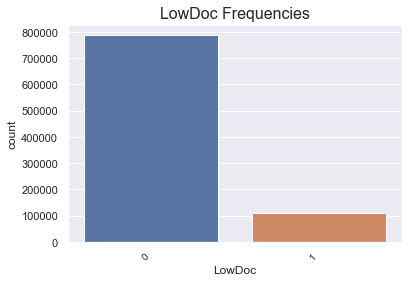

In [94]:
ax = sns.countplot(x =loans['LowDoc'] )
plt.title("LowDoc Frequencies",fontsize= 16)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='medium')

**FRANCHISE CODE** is a feature that describes if a business is a franchise or not and is denoted with '0' being no, and '1' being yes.  All records that were not coded as '0' were recoded to '1'.  Some examples of this would be records with 'Y', which would then be recoded to '1'.  The plot below confirms the cleaning and that two classes remain.

C:\Users\Jeff\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


(array([0, 1]), <a list of 2 Text xticklabel objects>)

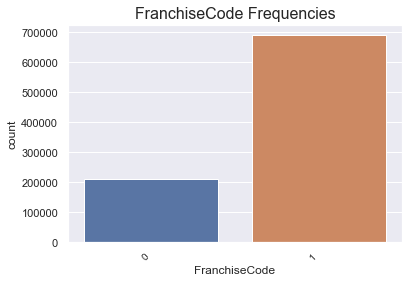

In [95]:
loans['FranchiseCode'].loc[(loans['FranchiseCode'] !=0)] = 1

ax = sns.countplot(x =loans['FranchiseCode'] )
plt.title("FranchiseCode Frequencies",fontsize= 16)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='medium')

There are over 50 categories for the **State** feature, where each category is a state or military address.  If all the states were converted via one-hot-encoding, or dummy coding, there would be a risk of overfitting.  To address this states will be grouped into the following regions: West, Midwest, Southwest, Southeast, and Northeast.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]),
 <a list of 53 Text xticklabel objects>)

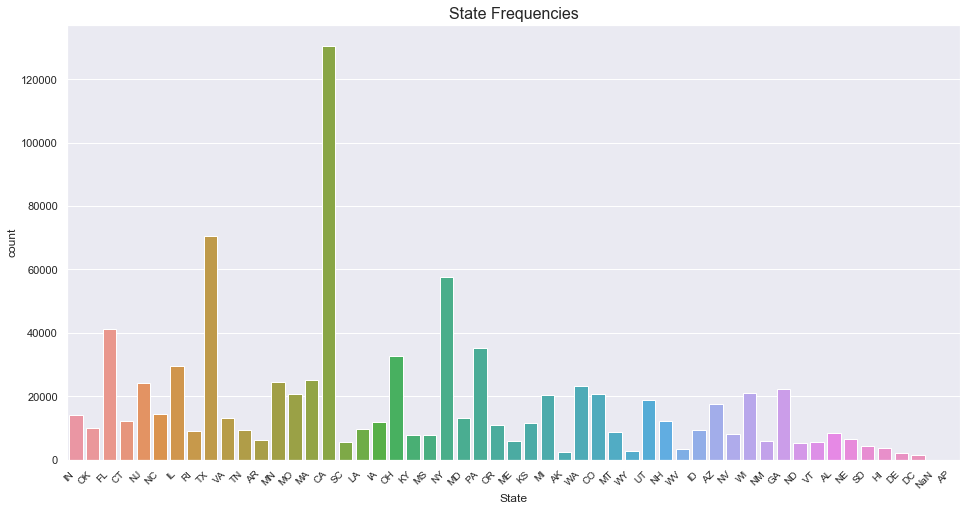

In [96]:
# State Distribution
plt.figure(figsize=(16,8))
ax = sns.countplot(x =loans['State'] )
plt.title("State Frequencies",fontsize= 16)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='medium')

After the **State** feature was binned by region, we can see that the 'West' has the most loan applocations, followed by the 'Northeast' and 'Midwest'.  The code below assigns each state to a region based on this map found on National Geographic:https://www.nationalgeographic.org/maps/united-states-regions/

The binning was confirmed by a barchart to ensure that all states were properly assigned to a region.  The barchart include frequency counts for ease of reading and was generated using a for loop.

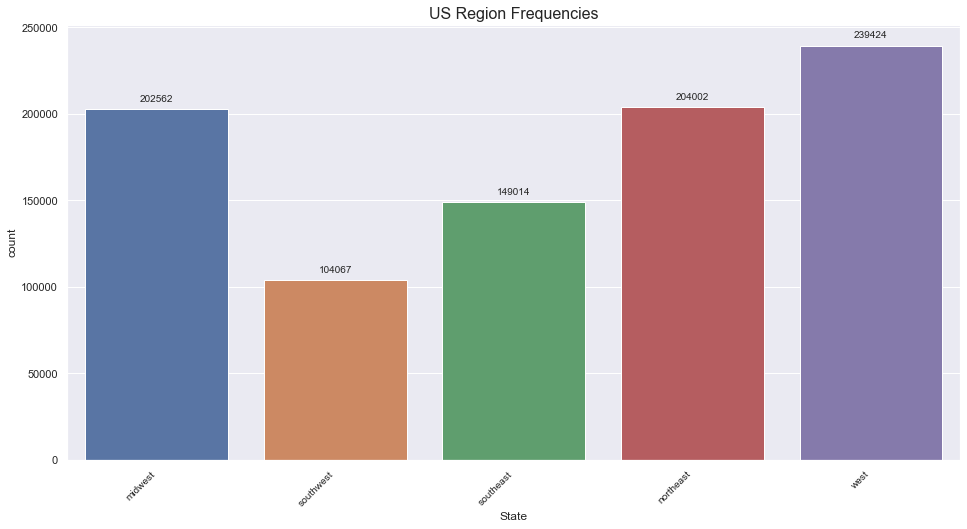

In [97]:
#Generate list of states
west = ['WA','OR','CA','NV','UT','CO','WY','MT','ID','AK','HI','AP','NaN']
midwest =['ND','SD','NE','KS','MO','IA','MN','MI','IL','IN','OH','WI']
southeast = ['AR','LA','MS','TN','KY','WV','VA','NC','SC','GA','FL','AL']
southwest = ['AZ','TX','NM','OK']
northeast = ['ME','VT','NH','CT','RI','NY','NJ','DE','MD','MA','PA','DC']

loans['State'].replace(to_replace = west, value = 'west', inplace = True)
loans['State'].replace(to_replace = midwest, value = 'midwest', inplace = True)
loans['State'].replace(to_replace = southeast, value = 'southeast', inplace = True)
loans['State'].replace(to_replace = southwest, value = 'southwest', inplace = True)
loans['State'].replace(to_replace = northeast, value = 'northeast', inplace = True)

plt.figure(figsize=(16,8))
ax = sns.countplot(x =loans['State'] )
plt.title("US Region Frequencies",fontsize= 16)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='medium')

for p in ax.patches:
    ax.annotate(p.get_height(),
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), textcoords = 'offset points')

In [98]:
loans = loans.reset_index(drop=True) #resets index, important when converting to array

In [99]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899069 entries, 0 to 899068
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   LoanNr_ChkDgt       899069 non-null  int64         
 1   Name                899069 non-null  object        
 2   City                899069 non-null  object        
 3   State               899069 non-null  object        
 4   Zip                 899069 non-null  object        
 5   Bank                899069 non-null  object        
 6   BankState           899069 non-null  object        
 7   NAICS               899069 non-null  category      
 8   ApprovalDate        899069 non-null  datetime64[ns]
 9   ApprovalFY          899069 non-null  object        
 10  Term                899069 non-null  int64         
 11  NoEmp               899069 non-null  int64         
 12  NewExist            899069 non-null  Int64         
 13  CreateJob           899069 no

After additional cleaning and binning of the categorical features we can see that the number of unique levels has decreased.  Having fewer levels per features should reduce the computational load.

### Quantitative Features

The correlation matrix below shows continuous features that help determine if a loan is paid in full or if it defaults.  The correlation matrix shows that **DisbursementGross** is strongly and positively with **SBA_Appr** and **GrAppv**; and **SBA_Appr** is strongly and positively correlated with **GrAppv**. **NoEmp** and **Term** feature show moderate or low correlation compared to the remaining features. **DisbursementGross**, **SBA_Appr** and **GrAppv** all relate to the amount of money a small business is approved for or received and the correlation matrix shows how strongly correlated those values are. It is most likely that values from DisbursementGross, **SBA_Appr** and **GrAppv** are the same or are very close to each other.

One assumption for logistic regression is minimal multicollinearity.  **DisbursmentGross**, **GRAppv**, and **SBA_Appv** are highly correlated (r > 0.90) with each other as they all describe the amount of money that is given to a loan applicant.  Since the **SBA_Appv** feature describes the amount of money that is approved and guaranteed to an applicant it will be kept.  **DisbursementGross** and **GrAppv** will be removed as they are both like **SBA_Appv**, but do not represent the final loan amount an applicant will receive.

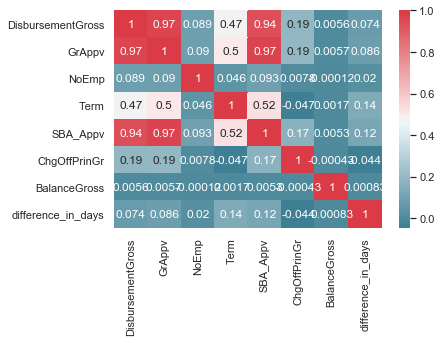

In [100]:
normal_data =['DisbursementGross', 'GrAppv', 'NoEmp', 'Term', 'SBA_Appv','ChgOffPrinGr', 
              'BalanceGross','BankState','difference_in_days']
loans_corr = loans[normal_data]

cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

#Generate a correlation matrix of transformed data
sns.set(style="darkgrid") # one of the many styles to plot using
sns.heatmap(loans_corr.corr(), cmap=cmap, annot=True)

For the agglomerative clustering records with an **MIS_Status** of 0 were selected to target loans that failed. **State**, **NAICS**, **Term**, and **SBA_Appv** were features that were chosen to help identify clusters.  We wanted to see if there are similarities for loan failures in their loan approval amount, business sector, region, and duration of the loan.

Categorical features were then one-hot encoded prior to use to allow for distance measures within similarity matrices to be calculated when a clustering algorithm was run on the data.  The original feature was then removed so that the one-hot-encoded features remained.

The .info() on the dataframe for the agglomerative clustering shows 16 features with 157,818 records that have a loan failure and are non-null.

In [120]:
defaults = loans[loans['MIS_Status']==0]
defaults = defaults.reset_index(drop=True)
default_features = ['State','NAICS','Term','SBA_Appv']

chg_off_data = defaults[default_features]

chg_off_data = pd.get_dummies(chg_off_data,columns=['NAICS','State'])

if 'NAICS' in chg_off_data:    
    del chg_off_data['NAICS']

Continuous data was standardized to remove the effects of **SBA_Appv** large dynamic range.  Loan approval amounts have large variation as some loan values are smaller while others are very large.  By standardizing the data distance measures can be consistent.  After **SBA_Appv_std** was created from standardized **SBA_Appv** values,**SBA_Appv** was removed.

The data then had the .info() function run to confirm that the appropriate changes occurred.  Upon visual inspection of the output, we confirmed that the changes that were intended occurred.

In [102]:
#Standardize Data
%matplotlib inline
# chg_off_data['NAICS']= chg_off_data['NAICS'].astype(float)

y = chg_off_data['SBA_Appv']
chg_off_data['SBA_Appv_std'] =(chg_off_data['SBA_Appv'] - chg_off_data['SBA_Appv'].mean())/chg_off_data['SBA_Appv'].std()
#defaults[['SBA_Apprv_std']]

if 'SBA_Appv' in chg_off_data:    
    del chg_off_data['SBA_Appv']  
    
chg_off_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157818 entries, 0 to 157817
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Term             157818 non-null  int64  
 1   NAICS_1          157818 non-null  uint8  
 2   NAICS_2          157818 non-null  uint8  
 3   NAICS_3          157818 non-null  uint8  
 4   NAICS_4          157818 non-null  uint8  
 5   NAICS_5          157818 non-null  uint8  
 6   NAICS_6          157818 non-null  uint8  
 7   NAICS_7          157818 non-null  uint8  
 8   NAICS_8          157818 non-null  uint8  
 9   NAICS_9          157818 non-null  uint8  
 10  State_midwest    157818 non-null  uint8  
 11  State_northeast  157818 non-null  uint8  
 12  State_southeast  157818 non-null  uint8  
 13  State_southwest  157818 non-null  uint8  
 14  State_west       157818 non-null  uint8  
 15  SBA_Appv_std     157818 non-null  float64
dtypes: float64(1), int64(1), uint8(14)
mem

In [103]:
chg_off_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157818 entries, 0 to 157817
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Term             157818 non-null  int64  
 1   NAICS_1          157818 non-null  uint8  
 2   NAICS_2          157818 non-null  uint8  
 3   NAICS_3          157818 non-null  uint8  
 4   NAICS_4          157818 non-null  uint8  
 5   NAICS_5          157818 non-null  uint8  
 6   NAICS_6          157818 non-null  uint8  
 7   NAICS_7          157818 non-null  uint8  
 8   NAICS_8          157818 non-null  uint8  
 9   NAICS_9          157818 non-null  uint8  
 10  State_midwest    157818 non-null  uint8  
 11  State_northeast  157818 non-null  uint8  
 12  State_southeast  157818 non-null  uint8  
 13  State_southwest  157818 non-null  uint8  
 14  State_west       157818 non-null  uint8  
 15  SBA_Appv_std     157818 non-null  float64
dtypes: float64(1), int64(1), uint8(14)
mem

None of the categorical variables available in this data set were ordinal in nature. As such the recommended method of clustering non-ordinal categorical variable is to one hot encode them. With one hot encoding each possible value for a categorical variable is expressed as a separate variable. This is used in both data sets, the data above which is mixed categorical and continuous and below which is purely categorical.

In [37]:
# Categorical only data used for KModes clustering
cat_only_features = ['State','NAICS','FranchiseCode','RevLineCr','LowDoc']

chg_off_cat_data = defaults[cat_only_features]

chg_off_cat_data = pd.get_dummies(chg_off_cat_data,columns=['State','NAICS','FranchiseCode','RevLineCr','LowDoc'])

if 'NAICS' in chg_off_cat_data:    
    del chg_off_cat_data['NAICS']
    
if 'State' in chg_off_cat_data:    
    del chg_off_cat_data['State']  
    
if 'State' in chg_off_cat_data:    
    del chg_off_cat_data['FranchiseCode']  

if 'State' in chg_off_cat_data:    
    del chg_off_cat_data['RevLineCr']  

if 'State' in chg_off_cat_data:    
    del chg_off_cat_data['LowDoc']  

chg_off_cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157818 entries, 0 to 157817
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   State_midwest    157818 non-null  uint8
 1   State_northeast  157818 non-null  uint8
 2   State_southeast  157818 non-null  uint8
 3   State_southwest  157818 non-null  uint8
 4   State_west       157818 non-null  uint8
 5   NAICS_1          157818 non-null  uint8
 6   NAICS_2          157818 non-null  uint8
 7   NAICS_3          157818 non-null  uint8
 8   NAICS_4          157818 non-null  uint8
 9   NAICS_5          157818 non-null  uint8
 10  NAICS_6          157818 non-null  uint8
 11  NAICS_7          157818 non-null  uint8
 12  NAICS_8          157818 non-null  uint8
 13  NAICS_9          157818 non-null  uint8
 14  FranchiseCode_0  157818 non-null  uint8
 15  FranchiseCode_1  157818 non-null  uint8
 16  RevLineCr_0      157818 non-null  uint8
 17  RevLineCr_1      157818 non-n

# Modeling and Evaluation 1

## Agglomerative Clustering

Running agglomerative clustering on all 157,818 "CHGOFF" records caused memory errors as the proximity matrix generated by the clustering algorithm was too large for RAM.  A random sample of n = 20000 was taken using pandas' sample() function to avoid memory errors and allow for rapid prototyping.

In [116]:
#data for models
cluster_sample=chg_off_data.sample(n=20000, replace=False, random_state=45)

### Agglomerative Helper Function

Since there are more than two features that were used for agglomerative clustering, visualizing the clusters was performed by a dendrogram instead of a scatterplot.  A dendrograms are ideal since there were 15 features used for this clustering algorithm.  Since scatterplots are intended for 2-dimensional data, showing clusters based on 15 features on scatter plots would result in a loss of information since only two continuous features can be shown at a time.

Dendrograms show the hierarchical structure of the data as the agglomerative clustering algorithm clusters based on a distance measure such as, but not limited to: Euclidean, Manhattan, or cosine distances.  The plot_dendrogram() helper function was used to show the clusters generated by an agglomerative clustering model.  This code was referenced from sklearn [here](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py).

In [39]:
from sklearn import manifold
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

The **linkage** parameter in the AgglomerativeClustering() function was adjusted to generate different clusters by defining inter-cluster similarity using either: minimum similarity, maximum similarity, group average, distance between centroids, or the use of an objective function.  For this project, the minimum distance (single linkage) and an objective function (Ward's method) will be used by the clustering algorithm to determine similarity.  Single linkages generate clusters based on minimizing the distance between data, while ward linkages aim to minimize the SSE.

For initial agglomerative modeling, the **distance_threshold** was set to 0 to allow the algorithm to determine the minimal value for distance or SSE based on the **linkage** method.  When **distance_threshold** parameter was set to 0, the algorithm requires that the **n_clusters** parameter be set to "None".  This allows the algorithm to generate its own clusters.

After each agglomerative clustering model was run, it was fit.  Fitting the models allowed for clusters to be identified through the use of dendrograms generated from the labels_ and children_ attributes utilized by the plot_dendrogram() helper function.

In [40]:
#Single Linkage
from sklearn.cluster import AgglomerativeClustering

cluster_model1 = AgglomerativeClustering(linkage='single',distance_threshold=0, n_clusters=None)
cluster_model1.fit(cluster_sample)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=0,
                        linkage='single', memory=None, n_clusters=None)

In [41]:
#Ward
cluster_model2 = AgglomerativeClustering(linkage='ward',distance_threshold=0, n_clusters=None)
cluster_model2.fit(cluster_sample)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=0, linkage='ward',
                        memory=None, n_clusters=None)

After the initial models generated clusters, a final agglomerative model was created to allow for labeling of data.  Based on visual inspection of dendrograms in "Model Evaluation 3" and analysis of summary stats and counts from "Model Evaluation 2" parameters for the final model were set.

Initial models for Ward linkage dendrograms showed two clusters, while single linkage showed three.  For the final model, the **n_clusters** parameter was then set to two.  When looking at the dendrograms, the summary statistics and counts between the two linkages, the single linkage clusters were not ideal as one cluster took up most of the records.  We can see that for the Ward linkage that the dendrograms show a more even distribution in the clusters.  Single linkage tends to be sensitive to outliers, whereas the Ward method is more robust to outliers.  This shows that the single linkage cluster potentially over generalized some of the records into a cluster that may not adequately describe the data. Based on these observations the **linkage** parameter was set to "ward".

The affinity parameter was adjusted to identify if different clustering would be generated.  For the Ward linkage only Euclidean can be used.  For single linkage Manhattan and Euclidean were used.  Three features were created to capture the cluster labels for each linkage-affinity combination. The labels were generated by the fit_predict() function and stored in the .labels_ attribute.

In [136]:
# create 3 models based on adjusting affinity
cluster_model3ward = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster_model3_single_eucl = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
cluster_model3_single_man = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='single')

#Fit models
cluster_model3ward.fit_predict(cluster_sample)
cluster_model3_single_eucl.fit_predict(cluster_sample)
cluster_model3_single_man.fit_predict(cluster_sample)

#label clusters in data
cluster_sample['cluster_ward'] = cluster_model3ward.labels_
cluster_sample['cluster_se'] = cluster_model3_single_eucl.labels_
cluster_sample['cluster_sm'] = cluster_model3_single_man.labels_

## Categorical Clustering (KModes)
We sought to cluster our data based upon categorical explanatory variables. This was achieved by utilizing the KModes clustering algorithm as implemented in the KModes library. 

### Parameter Selection
KModes requires the user to specify the number of clusters desired. We used the elbow method to determine the number of clusters. The cost attribute which is related to the Hamming distance present for a given set of clusters is used for the y-axis values.

Two different methods of selecting initial clusters, Huang and Cao, were used. The Huang method attempts to create large clusters initially and assign the centroids to them. The Cao method uses density and measure of dissimilarity to assign centroids.

Both initialization methods can have very different outcomes from one run to the next, so multiple iterations of the model were created. The function picks the best run from several runs based upon cost.

### Discussion on KModes
The KModes module uses the Hamming distance as a measure. The Hamming distance measures the dissimilarity between data points. A low Hamming distance exists between very similar data points. Higher Hamming distances mean the points are not similar. The hamming distance is returned as the “cost_” attribute by the KModes function. The data used for KModes was one hot encoded categorical only data.

In [43]:
from kmodes.kmodes import KModes

column_names = ["NumCluster", "Cost", "init"]

CatClusterCost = pd.DataFrame(columns = column_names)

for NumClust in range(1,31):

    # huang
    kmh = KModes(n_clusters=NumClust, init='huang', n_init=5, verbose=0, n_jobs=-1, random_state=42)
    clusters = kmh.fit_predict(chg_off_cat_data)
    
    cost = kmh.cost_
    
    to_append = [NumClust, cost, 'huang']
    a_series = pd.Series(to_append, index = CatClusterCost.columns)
    CatClusterCost = CatClusterCost.append(a_series, ignore_index=True)

    # cao
    kmc = KModes(n_clusters=NumClust, init='cao', n_init=5, verbose=0, n_jobs=-1, random_state=42)
    clusters = kmc.fit_predict(chg_off_cat_data)
    
    cost = kmc.cost_
    
    to_append = [NumClust, cost, 'cao']
    a_series = pd.Series(to_append, index = CatClusterCost.columns)
    CatClusterCost = CatClusterCost.append(a_series, ignore_index=True)


Both the Huang and Cao initialization methods were used. The record data is plotted below. The selected elbow number of clusters will be picked and rerun with a higher n_itit parameter. Examining the elbow graph below it appears that 8 clusters and the Huang method deliver the best results.

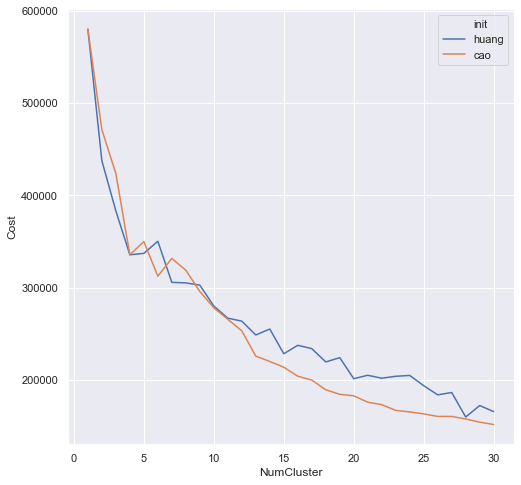

In [44]:
x = CatClusterCost['NumCluster']
y = CatClusterCost['Cost']
t = CatClusterCost['init']

plt.figure(figsize=(8, 8))
ax = sns.lineplot(x,y,hue=t)

# Modeling and Evaluation 2

Explanatory data analysis was preformed on the clusters to determine which model preformed best. For visualizations of this EDA please see the "Model and Evaluation 3" section.

## Agglomerative Clustering EDA

Continuous and categorical features were specified, and clusters were separated into sets for exploratory data analysis and summary statistics in the code below.  The one_hot_counter() helper function was created to provide counts from each one-hot-encoded feature.

one_hot_counter() takes a cluster set, and list of one-hot-encoded columns from a feature as arguments.  It uses a loop to iterate over each one-hot-encoded column, counts all non-zero values, adds it to a list, and returns the list.  The list returned by one_hot_counter() can then be used for EDA or visualization.

In [45]:
cluster1w = cluster_sample[cluster_sample['cluster_ward']==0]
cluster2w = cluster_sample[cluster_sample['cluster_ward']==1]

cluster1se = cluster_sample[cluster_sample['cluster_se']==0]
cluster2se = cluster_sample[cluster_sample['cluster_se']==1]

cluster1sm = cluster_sample[cluster_sample['cluster_sm']==0]
cluster2sm = cluster_sample[cluster_sample['cluster_sm']==1]

continuous_var = ['Term','SBA_Appv_std']
NAICS = ['NAICS_1', 'NAICS_2', 'NAICS_3', 'NAICS_4', 
           'NAICS_5', 'NAICS_6', 'NAICS_7', 'NAICS_8', 'NAICS_9']
region = ['State_midwest', 'State_northeast', 'State_southeast', 
          'State_southwest', 'State_west']

In [46]:
def one_hot_counter(cluster, variable_name):
    #iterates over a list of one-hot-encoded columns and return a count of non-zero values
    var_count = []
    for var_name in variable_name:
        var_count.append(np.count_nonzero(cluster[var_name]==1))
    return var_count

Another helper function was created to convert standardized values back to dollar figures for ease of understanding.  The function rearranges the z-score formula and solves for the sample mean.

In [107]:
def convert_dollars(zscore, mean, std):
    print((zscore*std)+mean)

### Categorical EDA

Clusters for each linkage type were separated in individual sets and filtered for the categorical features.  When looking at NAICS we can see that the Euclidean and Manhattan linkages cluster most of the data into cluster 2.  However, when we look at cluster 1 for both Euclidean and Manhattan linkages there are minimal records.  The Ward method puts more data into cluster 1, but still was able to include a decent number of records into cluster 2.

When the Ward method was used NAICS_4 (Trade and Transportation) for cluster 1 and NAICS_7 (Arts and Hospitality) for cluster 2 are most common.  When Euclidean or Manhattan linkages are used, NAICS_4 (Trade and Transportation) for cluster 2 and NAICS_7 (Trade and Transportation) for cluster 1 are most common.  The main difference between the linkages are that the most common sectors are similar and counts for Euclidean and Manhattan are very low.

In [47]:
c1_naics_ct_w = one_hot_counter(cluster1w, NAICS) 
c2_naics_ct_w = one_hot_counter(cluster2w, NAICS)   
c1_naics_ct_se = one_hot_counter(cluster1se, NAICS)
c2_naics_ct_se = one_hot_counter(cluster2se, NAICS) 
c1_naics_ct_sm = one_hot_counter(cluster1sm, NAICS) 
c2_naics_ct_sm = one_hot_counter(cluster2sm, NAICS) 

d = {'NAICS':NAICS, 'Cluster 1 Counts (Ward)':c1_naics_ct_w,'Cluster 1 Counts (Single Euclidean)':c1_naics_ct_se,
     'Cluster 1 Counts (Single Manhattan)':c1_naics_ct_sm,'Cluster 2 Counts (Ward)':c2_naics_ct_w,
     'Cluster 2 Counts (Single Euclidean)':c2_naics_ct_se,'Cluster 2 Counts (Single Manhattan)':c2_naics_ct_sm,}
pd.DataFrame(data=d)

,NAICS,Cluster 1 Counts (Ward),Cluster 1 Counts (Single Euclidean),Cluster 1 Counts (Single Manhattan),Cluster 2 Counts (Ward),Cluster 2 Counts (Single Euclidean),Cluster 2 Counts (Single Manhattan)
0,NAICS_1,73,0,0,29,102,102
1,NAICS_2,1894,0,0,42,1936,1936
2,NAICS_3,1256,0,0,64,1320,1320
3,NAICS_4,5328,0,0,184,5512,5512
4,NAICS_5,3877,0,0,74,3951,3951
5,NAICS_6,834,0,0,67,901,901
6,NAICS_7,3872,4,4,607,4475,4475
7,NAICS_8,1693,0,0,104,1797,1797
8,NAICS_9,2,0,0,0,2,2


Like the cluster 1 summary stats, the Euclidean and Manhattan distances clustered most of the data into cluster 2, and few records into cluster 1 for the **Region** feature.  For the Ward linkage, most of the data was clustered into cluster 1, however there were still many records for cluster 2.

For the Euclidean and Manhattan distances for single linkage, the region with the most records was the West for cluster 1 and the West for cluster 2.  For the Ward method, the West was most common for cluster 1, and the Midwest was most common for cluster 2.

In [48]:
c1_region_ct_w =one_hot_counter(cluster1w, region) 
c2_region_ct_w =one_hot_counter(cluster2w, region)
c1_region_ct_se =one_hot_counter(cluster1se, region)  
c2_region_ct_se =one_hot_counter(cluster2se, region)
c1_region_ct_sm =one_hot_counter(cluster1sm, region)   
c2_region_ct_sm =one_hot_counter(cluster2sm, region)

d2 = {'Region': region,'Cluster 1 Counts (Ward)':c1_region_ct_w,'Cluster 1 Counts (Single Euclidean)':c1_region_ct_se,
     'Cluster 1 Counts (Single Manhattan)':c1_region_ct_sm,'Cluster 2 Counts (Ward)':c2_region_ct_w,
     'Cluster 2 Counts (Single Euclidean)':c2_region_ct_se,'Cluster 2 Counts (Single Manhattan)':c2_region_ct_sm,}

pd.DataFrame(data=d2)

,Region,Cluster 1 Counts (Ward),Cluster 1 Counts (Single Euclidean),Cluster 1 Counts (Single Manhattan),Cluster 2 Counts (Ward),Cluster 2 Counts (Single Euclidean),Cluster 2 Counts (Single Manhattan)
0,State_midwest,3773,1,1,289,4061,4061
1,State_northeast,4044,0,0,156,4200,4200
2,State_southeast,3804,0,0,279,4083,4083
3,State_southwest,2281,1,1,225,2505,2505
4,State_west,4927,2,2,222,5147,5147


### Continuous Feature EDA


#### Cluster 1

The Ward linkage Cluster 1's continuous feature summary statistics show that the median **Term** length was 48 months.  The 25th and 75th percentile are roughly the same distance from the median, but has a large maximum value.  This suggests that this feature is slightly right skewed.

The median **SBA_Appv_std** amount was at a value of -0.379075 on the standard distribution and is left skewed as the 25th percentile is closer than the 75th percentile.  There are a total of 18829 of the 20000 records in this cluster.

In [49]:
cluster1w[continuous_var].describe()

,Term,SBA_Appv_std
count,18829.000000,18829.000000
mean,48.346752,-0.117252
std,27.402235,0.786405
min,0.000000,-0.538157
25%,28.000000,-0.459096
50%,48.000000,-0.379075
75%,65.000000,-0.155014
max,126.000000,9.063468


The Single linkage utilizing the Euclidean distance for Cluster 1's continuous feature summary statistics that there are 4 records of 20000.  It is difficult to establish a distribution from this data since there are so few records.  The **Term** records are all very close to 400 months, while SBA_Appv_std has a range of -0.32590 to 1.33387.

In [50]:
cluster1se[continuous_var].describe()

,Term,SBA_Appv_std
count,4.000,4.000000
mean,392.750,0.640880
std,31.245,0.777105
min,352.000,-0.325940
25%,376.750,0.183957
50%,399.000,0.778037
75%,415.000,1.234960
max,421.000,1.333387


The Single linkage utilizing the Euclidean distance for Cluster 1's continuous feature summary statistics that there are 4 records of 20000.  It is difficult to establish a distribution from this data since there are so few records.  The **Term** records are all very close to 400 months, while SBA_Appv_std has a range of -0.32590 to 1.33387.

In [51]:
cluster1sm[continuous_var].describe()

,Term,SBA_Appv_std
count,4.000,4.000000
mean,392.750,0.640880
std,31.245,0.777105
min,352.000,-0.325940
25%,376.750,0.183957
50%,399.000,0.778037
75%,415.000,1.234960
max,421.000,1.333387


#### Cluster 2

The Ward Cluster 2's continuous feature summary statistics show that the median **Term** length was 198 months.  The 75th percentile further from the 50th percentile compared to the 25th percentile.  This suggests that this feature is right skewed in shape.

The median **SBA_Appv_std** value was 1.38139, with the 75th percentile further from the 50th percentile compared to the 25th percentile distance from the 50th percentile.  This suggests that the data is right skewed for **SBA_Appv_std**for this cluster.  This cluster contains 1171 of the 20000 records.

In [52]:
cluster2w[continuous_var].describe()

,Term,SBA_Appv_std
count,1171.000000,1171.000000
mean,203.516652,1.966675
std,48.869112,1.987203
min,125.000000,-0.471131
25%,161.500000,0.414707
50%,198.000000,1.381399
75%,245.000000,3.077696
max,421.000000,9.063468


The Single linkage utilizing the euclidean distance for Cluster 2's continuous feature summary statistics show that the median **Term** length was 50 months. The 25th and 75th percentiles are roughly normal in shape, however there is a large maximum suggesting a long thin tail.

The median **SBA_Appv_std** value is -0.379075, with the 75th percentile is much further away from the median compared to the 25th percentile.  This cluster contains 19996 of the 20000 records.  Given that cluster 2 contains the majority of the records, it does not provide enough segmentation into the loans that have failed is not ideal.

In [53]:
cluster2se[continuous_var].describe()

,Term,SBA_Appv_std
count,19996.000000,19996.000000
mean,57.364873,0.004635
std,46.386395,1.026002
min,0.000000,-0.538157
25%,30.000000,-0.459096
50%,50.000000,-0.379075
75%,69.000000,-0.026980
max,307.000000,9.063468


The Single linkage utilizing the euclidean distance for Cluster 2's continuous feature summary statistics show that the median **Term** length was 50 months. The 25th and 75th percentiles are roughly normal in shape, however there is a large maximum suggesting a long thin tail.

The median **SBA_Appv_std** value is -0.379075, with the 75th percentile is much further away from the median compared to the 25th percentile.  This cluster contains 19996 of the 20000 records.  Given that cluster 2 contains the majority of the records, it does not provide enough segmentation into the loans that have failed is not ideal.

In [54]:
cluster2sm[continuous_var].describe()

,Term,SBA_Appv_std
count,19996.000000,19996.000000
mean,57.364873,0.004635
std,46.386395,1.026002
min,0.000000,-0.538157
25%,30.000000,-0.459096
50%,50.000000,-0.379075
75%,69.000000,-0.026980
max,307.000000,9.063468


The mean and standard deviation were taken from the orignal **SBA_Appv** data to allow for conversion of **SBA_Appv_std** values back to dollar figures.  This conversion will be used for the final analysis of clusters.

In [149]:
chg_off_data['SBA_Appv'].mean()

84214.44777528546

In [150]:
chg_off_data['SBA_Appv'].std()

156207.93359026362

In [152]:
#ward cluster 1
convert_dollars(-0.379075,84214.45, 156207.93)
#ward cluster 2
convert_dollars(1.381399,84214.45, 156207.93)

24999.928935249998
299999.92829407


### Agglomerative Clustering Comparison

When comparing the Ward method versus the Euclidean and Manhattan distances, the Ward method did a better job of creating clusters that had numerous records with distinct summary statistics and categorical feature counts.  Both Euclidean and Manhattan distance measures are not optimal for higher dimensional data, due to the curse of dimensionality as the number of features increase the volume of calculations increases dramatically.

Although the Ward method clustered a large volume into Cluster 2, there were still many records for cluster 1.  When looking at the summary statistics and categorical counts we can see that "CHGOFFS" with a median **Term** of 48 months from the Arts and Hospitality industry and the west are most common in cluster 1; while cluster 2 has a median term of 198 months with Trade and Transportation and the West region being most common.

When looking at the Euclidean and Manhattan distance clustering most data was clustered into cluster 2 with a median **Term** of 198 months from the "Trade and Transportation" Sector and the West region.  Cluster 1 has so few records that it is not informative to use that cluster as most records are in cluster 2.

Given this information, the Ward methods provides 2 clusters with a good volume of records for both clusters with distinct and separate medians and categorical counts.  The use of this model will be explained in "Model and Evaluation 4".

## Categorical Clustering EDA (KModes)

In [55]:
km_cat8 = KModes(n_clusters=8, init='huang', n_init=20, verbose=0, random_state=42, n_jobs=-1)

cat_clusters8 = km_cat8.fit_predict(chg_off_cat_data)

CatClustCent = km_cat8.cluster_centroids_
cat_shape = CatClustCent.shape

column_names = ["ClusterNum", "NominalVarsClustered"]

CatText = pd.DataFrame(columns = column_names)

for i in range(cat_shape[0]):
    Catnum = [i]
    cent = CatClustCent[i,:-1]
    Catstr = ''
    for j in chg_off_cat_data.columns[(np.nonzero(cent))]:
        if len(Catstr) == 0:
            Catstr = j
        else:
            Catstr = Catstr + ', ' + j
    
    CatText.loc[i] = [i,Catstr]

from IPython.display import display, HTML

display(HTML(CatText.set_index('ClusterNum').to_html()))    

,NominalVarsClustered
ClusterNum,
0,"FranchiseCode_1, RevLineCr_1, LowDoc_0"
1,"FranchiseCode_0, RevLineCr_1, LowDoc_0"
2,"FranchiseCode_0, RevLineCr_0, LowDoc_0"
3,"State_midwest, FranchiseCode_1, RevLineCr_0, LowDoc_0"
4,"State_southeast, FranchiseCode_1, RevLineCr_0, LowDoc_0"
5,"State_northeast, FranchiseCode_1, RevLineCr_0, LowDoc_0"
6,"State_west, FranchiseCode_1, RevLineCr_0, LowDoc_0"
7,"State_southwest, FranchiseCode_1, RevLineCr_0, LowDoc_0"


Categorical clustering reveals several points of interest in the failed loans. All clusters have low document loans equal to “No” as a value. This indicates that the low document variable is of little interest to the overall model for failed loans since it does not vary from cluster to cluster.

All five geographic regions appear as cluster values. Some differences in clustering may be regional depending upon other clustered variables.

None of the business sector variables appear in the clustering. This may indicate that failed loans distribute proportionally across the different business sectors. This result, if true, is significant as it would indicate that the difference in risks across the different business sectors is minimal.

### KModes and Agglomerative Clustering Comparison

Agglomerative and KModes are two quite different types of clustering algorithms. The agglomerative clustering algorithm generated two or three clusters for the data, KModes eight different clusters. KModes identified different clusters for each region for franchise businesses without low document loans or revolving lines of credit. Term is an important variable in agglomerative clustering, but since it is a continuous variable it was not used in KModes. A better approach for KModes would have been to bin the term variable and use the binned values as well. The KModes algorithm generated more numerous clusters and each cluster had a significant number of members. Some of the variations of agglomerative clustering produced very lopsided clustering, with some clusters having very few members. Both algorithms demonstrated the capability of identifying combinations of variables within specific clusters. These clustered variables indicate relationships that might not be readily apparent with other methods of examining the data.

# Modeling and Evaluation 3

## Agglomerative Clustering Visualizations

The dendrogram generated by the plot_dendrogram() helper function shows the clusters present for agglomerative clustering utilizing single linkages with Euclidean distance as a similarity measure.  We can see that there are three distinct clusters, however most of the data is in the green cluster and very few records are in the green or blue cluster.

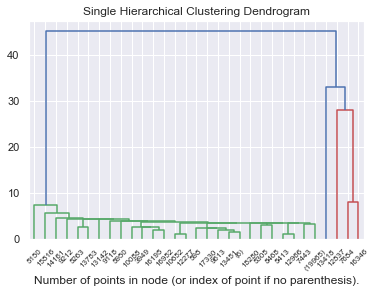

In [56]:
# Single Linkage Dendrogram
plt.title('Single Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(cluster_model1, truncate_mode='level', p=15)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

The dendrogram generated below is for an agglomerative cluster model utilizing the Ward Method with Euclidean distance as a similarity measure.  We can see two distinct clusters with most of the data in the red cluster and a large number of records in the green cluster.

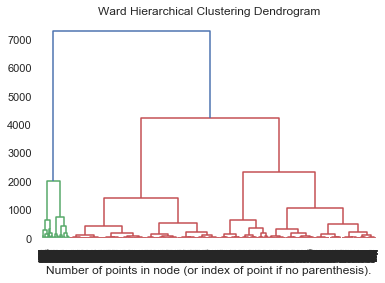

In [57]:
# Ward Linkage Dendrogram
plt.title('Ward Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(cluster_model2, truncate_mode='level', p=15)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

The two dendrograms above were used to help visually determine how many clusters and which linkage method was ideal for the data for the final model.  Based on visual inspection and the results from the "Model Evaluation 2" section the Ward method yields better clusters.

The categorical_plot() helper function was created to visualize counts of a one-hot-encoded feature.  This function has two arguments: cluster and variable_name.  These arguments are fed into one_hot_counter() helper function, which then returns a list of counts for each one-hot-encoded level of a feature and a visualization.

In [58]:
def categorical_plot(cluster, variable_name):
    #counts non-zero values from one-hot encoded column and returns a list
    var_count = one_hot_counter(cluster, variable_name)
        
    plt.figure(figsize=(8, 6))
    ax = plt.bar(x = variable_name, height = var_count)
    plt.title("Cluster Frequency",fontsize= 16)
    plt.xticks(rotation=45) 
    print(var_count)

### Ward Method

For cluster 1 we can see that NAICS_4 (Trade and Transportation) and for cluster 2 NAICS_7 (Arts and Hospitality) are most prevalent for their respective clusters.  The "Model Evaluation 2" section goes into more detail for these clusters.

[73, 1894, 1256, 5328, 3877, 834, 3872, 1693, 2]


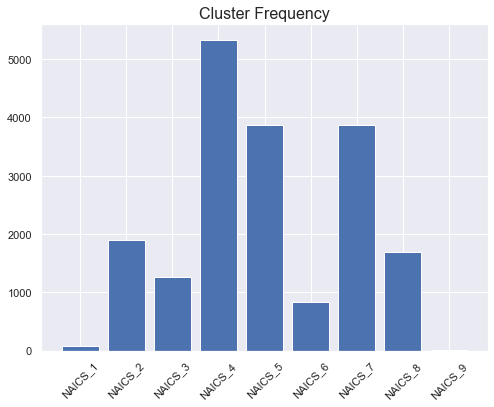

In [59]:
# Cluster 1 NAICS
categorical_plot(cluster1w, NAICS)

[29, 42, 64, 184, 74, 67, 607, 104, 0]


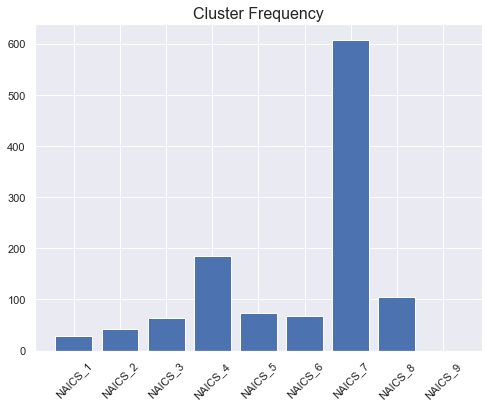

In [60]:
#Cluster 2 NAICS
categorical_plot(cluster2w, NAICS)


For cluster 1 the West region is most common.  For cluster 2 the Midwest is most common. The "Model Evaluation 2" section goes into more detail for these clusters.

[3773, 4044, 3804, 2281, 4927]


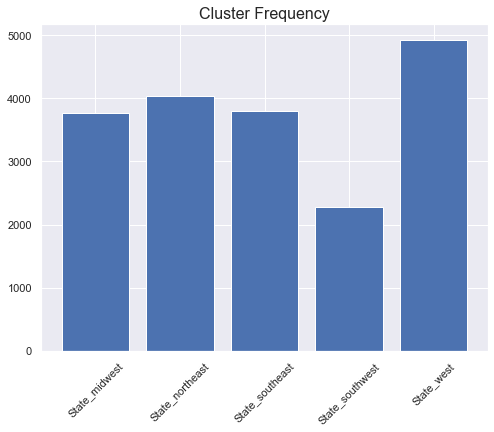

In [61]:
#Cluster 1 Regions
categorical_plot(cluster1w, region)

[289, 156, 279, 225, 222]


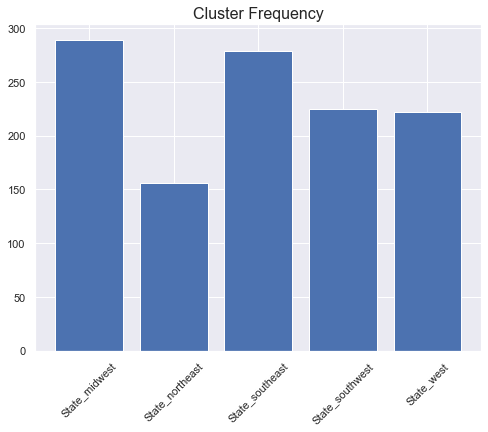

In [62]:
#Cluster 2 Regions
categorical_plot(cluster2w, region)

### Euclidean and Manhattan

For cluster 1 we can see the only business sector present was NAICS_7 (Arts and Hospitality) and for cluster 2 NAICS_4 (Trade and Transportation) was most prevalent.  The "Model Evaluation 2" section goes into more detail for these clusters.

[0, 0, 0, 0, 0, 0, 4, 0, 0]


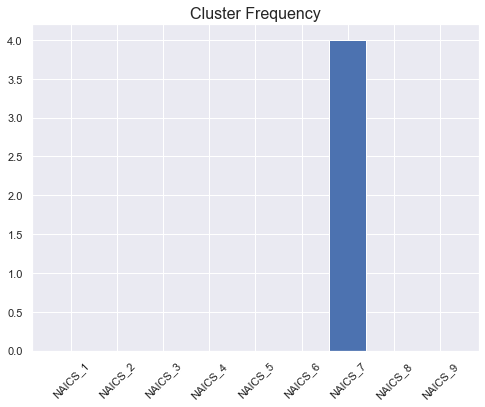

In [63]:
# Cluster 1 NAICS
categorical_plot(cluster1se, NAICS)

[102, 1936, 1320, 5512, 3951, 901, 4475, 1797, 2]


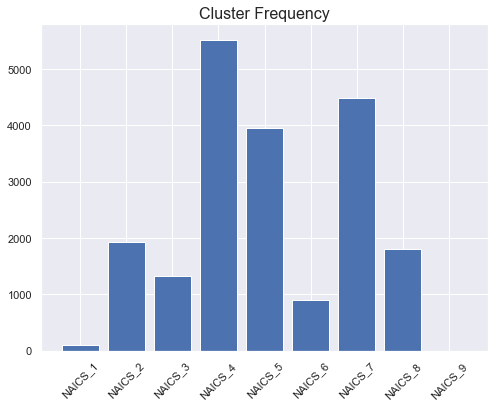

In [64]:
#Cluster 2 NAICS
categorical_plot(cluster2se, NAICS)


For cluster 1 and 2 the West region is most common.  Please note for this method the majority of the data is contained in cluster 2. The "Model Evaluation 2" section goes into more detail for these clusters.


[1, 0, 0, 1, 2]


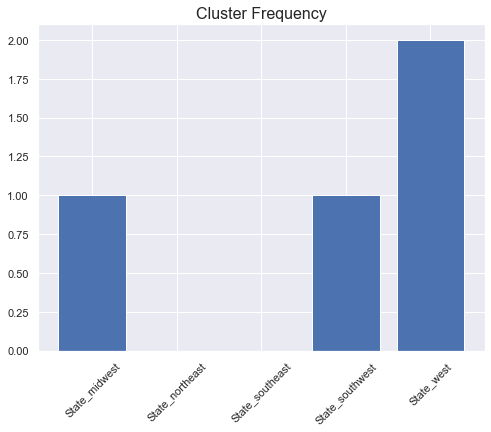

In [65]:
#Cluster 1 Regions
categorical_plot(cluster1se, region)

[4061, 4200, 4083, 2505, 5147]


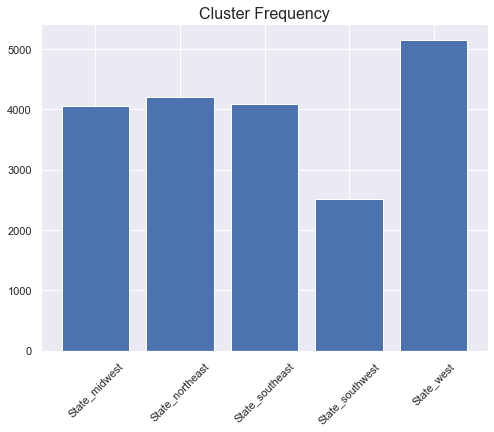

In [66]:
#Cluster 2 Regions
categorical_plot(cluster2se, region)

## Categorical Clustering visualization (KModes)
The chart below has a bar for each one hot encoded variable. The bars show the relative count of failed loans broken down by assigned cluster. The regional data has similar amounts of records in each of the first three categories Midwest, Northeast, and Southeast. Fewer failed loans were made in the Southwest region and more failed loans were made in the Western region. Very few failed loans occurred in NAICS sectors 1 and 9 (Agriculture and Public Administration). The other sectors display varying counts. Both franchise code and revolving line of credit are clustered where each cluster is either a “Yes” or “No” value, none of the clusters have loans where franchise code is both “Yes” and “No”. Low document “Yes” and “No” values are partially spread between clusters. Some low document “Yes” loans belong to the same cluster as low document “No” loans.

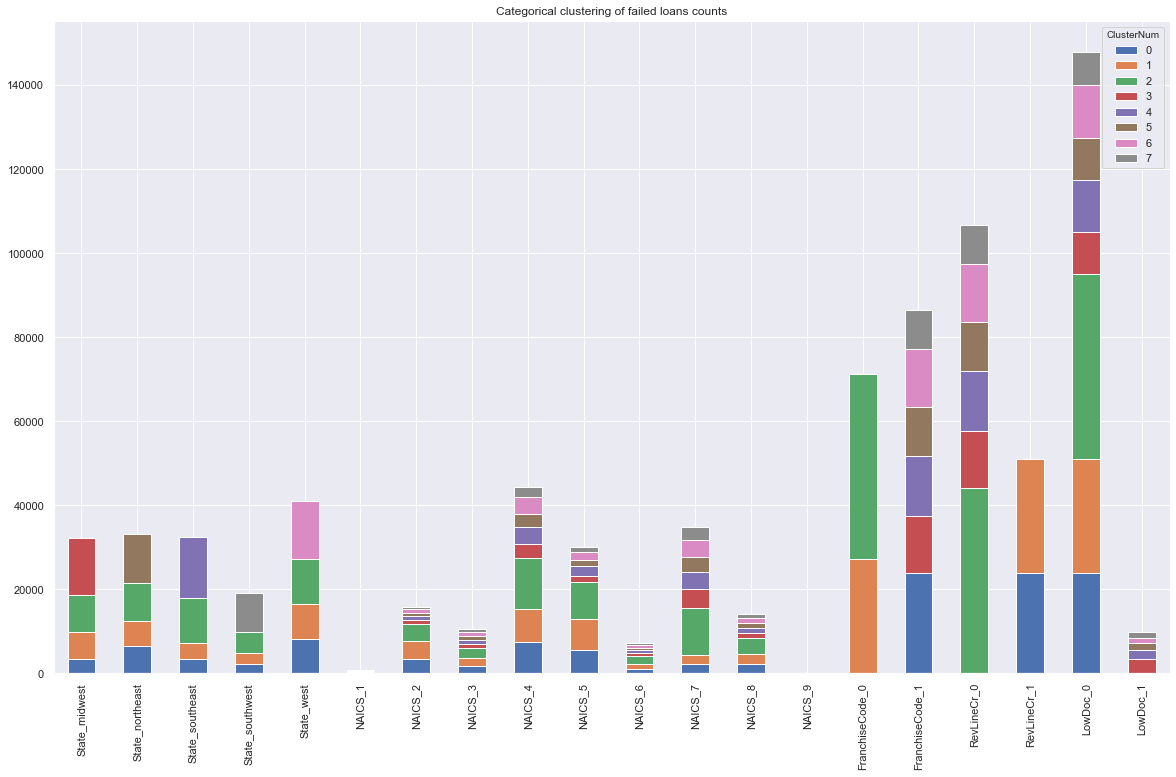

In [67]:
chg_off_cat_data['ClusterNum'] = km_cat8.labels_

AttribVar = ['State_midwest', 'State_northeast', 'State_southeast', 'State_southwest', 'State_west'
             , 'NAICS_1', 'NAICS_2', 'NAICS_3', 'NAICS_4', 'NAICS_5', 'NAICS_6', 'NAICS_7', 'NAICS_8', 'NAICS_9'
             , 'FranchiseCode_0', 'FranchiseCode_1'
             , 'RevLineCr_0', 'RevLineCr_1'
             , 'LowDoc_0', 'LowDoc_1']

ResponseVar = ['ClusterNum']

columns = ResponseVar + AttribVar

ClustCount = pd.DataFrame(columns=columns)

for ClusterNum in range(8):
    
    # create empty list for cluster count
    ClustRow = [ClusterNum]

    for av in AttribVar:
        tmp = chg_off_cat_data[chg_off_cat_data['ClusterNum']==ClusterNum].sum()[av]
        ClustRow.append(tmp)
    
    ClustCount.loc[ClusterNum] = ClustRow
 
ClustCount.set_index('ClusterNum')\
  .T.plot(kind='bar', stacked=True,
          figsize=(20,12),title='Categorical clustering of failed loans counts')


# Modeling and Evaluation 4

## Agglomerative Clustering

For the n = 20,000 sample of loans that have charged-off, two clusters were generated by the agglomerative clustering algorithm.  Based on exploratory data analysis cluster 1 and 2 have the following characteristics based on the most common categorical counts and maximum median values:

**Cluster 1**  
- Business Sector: NAICS_4 (Trade and Transportation), NAICS_5 (Professional and Scientific)
- Region: West, Northeast
- Term: 48 months
- Median SBA_Appv z-score: 1.38139 ($24,999.93, converted via convert_dollars() helper function) 

**Cluster 2**
- Business Sector: NAICS_7 (Arts and Hospitality), NAICS_4 (Trade and Transportation)
- Region: West, Southeast
- Term: 198 months
- Median SBA_Appv z-score: -0.379075 ($299,999.93, converted via convert_dollars() helper function)

Loans that are at risk of failure that are grouped with cluster 1 tend to be accounts that are in the Trade and Transportation sector,or Professional and Scientific sector, in the West or Northeast, with 48 month loan terms, and a median SBA_Appv amount of $24,999.93.  Given that the Trade and Transportation sector might take loans out for motor vehcile assests, and the general auto loan terms are generally 60 months this cluster makes sense.  Alternatively a Laboratory may need a loan to purchase new equipment like a set of incubators or PCR machines.  Given this information a record associated with this cluster is most likely involved with transportation that requires an addition of a vehicle to a fleet or a Laboratory that needs to acquire more equipment.

Records grouped with cluster 2 tend to be in the Arts and Hospitality sector, or Trade and Transportation, are located in the Southeast or West, have term lengths that were +15 years, and had a median SBA_Appv amount of $299,999.93.  It appears that the loans would be taken out for restaurant facilities, supplies, or other expenses, or for the acquisition of a large volume of vehicles for a motor fleet.  Given this information a record associated with this cluster is most likely a restaurant that requires a large loan amount to start up, or more motor assets that are being added to a fleet.

Looking at the summary information above and the "Model Evaluation 2" section each cluster has characteristics that are distinct from each other.  There is some overlap with between each cluster for both continuous and categorical features, however the clusters are not identical and provide enough delineation to see some key differences between groups of loans.

## Categorical Clustering
Categorical clustering of the failed loans reveals the following points of interest. The southeast region has nearly the same number of failed loans as the midwest and northeast regions. This is despite an initial distribution where the midwest region has fewer overall loans made than either the midwest or northeastern regions. 

Concentrating on clusters 1 (no franchise, revolving line of credit), 2 (no franchise, no revolving line of credit), and 0 (franchise, revolving line of credit) which lack a geographic component reveals the following. Cluster number 2 seems to be distributed in even proportions amongst the geographic variables. No franchise, no revolving line of credit loans seem to fail in a proportionate manner geographically. Cluster 1 shows a higher occurrence in the west and a lower occurrence in the southeast. Non-franchisees with a revolving line of credit fail at a greater proportion in the west than average, and at a lesser proportion than average in the southeast. Cluster 0 has a higher occurrence in the west than in other geographic regions. Failed loans for franchisees with a revolving line of credit are more prevalent in the west than other regions. Failed loans to franchisees without a revolving line of credit breakdown on geographic lines. It appears that in the southeast region a greater proportion of failed loans fall into this category than in other regions.

Business sector category variables show a different ranking in number of failed loans versus overall loans. Overall loans breakdown with the most loans being made in sector 7 then 4 then 5. Sectors 1 and 9 have very few loans made. Sectors 2, 3, 6, and 8 have nearly the same number of loans made. Failed loans have a different breakdown. Business sectors 4 and 7 swap places for 1st and 2nd. Differences exist for failed loans between sectors 2, 3, 6, and 8. By clusters of failed loans business sector 7 has greater than normal non-franchise no revolving line of credit failed loans, and less than normal non-franchise revolving line of credit failed loans.

The low documentation “Yes” categorical variable failed to cluster. This is probably due to the extremely low number of failed loans with low documentation. The low documentation type of categorical variables has less than 10,000 loans with low documentation that failed as opposed to over 140,000 loans that failed that required full documentation. Looking at the chart from the initial EDA it appears that the proportion of low document loans overall is slightly over 100,000 to just under 800,000 full document loans. It appears that the selection criteria for deciding who can have a low document loan works better than random chance.

Franchise code type categorical variables are split nearly evenly between non franchise and franchise failed loans. This contrasts with the initial EDA where there are more than three times as many loans made to franchises as not. So, a higher ratio of loans made to non-franchisees fail when compare to loans made to franchisees.

Failed loans had a revolving credit line at slightly less than half the rate as failed loans without a revolving line of credit. This contrasts with less than a third of all loans having a revolving line of credit. Loans made with a revolving line of credit fail at a greater rate than those that do not have a revolving line of credit.

Conclusions from categorical variable clustering are as follows. The southeast region has nearly the same number of failed loans as the midwest and northeast regions. This is despite an initial distribution where the midwest region has fewer overall loans made than either the southeasternt or northeastern regions. Non-franchisees with a revolving line of credit fail at a greater proportion in the west than average, and at a lesser proportion than average in the southeast. Failed loans for franchisees with a revolving line of credit are more prevalent in the west than other regions. Failed loans to franchisees without a revolving line of credit breakdown on mostly geographic lines. It appears that in the southeast region a greater proportion of failed loans fall into this category than in other regions. Business sector 4 (Trade and Transportation) has more failed loans than would be expected from the total number of loans made. The low documentation “Yes” categorical variable failed to cluster due to the small number of loans made with this variable. It appears that the selection criteria for deciding who can have a low document loan works better than random chance. A higher ratio of loans made to non-franchisees fail when compare to loans made to franchisees. Loans made with a revolving line of fail at a greater rate than those that do not have a revolving line of credit.


# Deployment

The data set the clustering models are based upon is updated on an infrequent basis, most likely monthly. As such the models only require updating when the dataset is refreshed. The clustering models should be deployed as a report with a strong conclusion or executive summary section that would allow its impacts to be estimated before delving into the details of the report.  Loan officers, approval committees, banks, or those seeking loans would benefit from this information.  Having this information can help identify strategies to support loans that are struggling or provide extra scrutiny towards potential loans that may fail.

Categorical clustering led to some insights into the data. Greater than expected proportions of failed loans exist for some combinations of categories. Correct decisions on loans can be enhanced by giving these loans extra scrutiny. It might be further illuminating to bin many of the continuous variables and examine them along with the other categorical variables. Other information that might be beneficial is income data by zip code, this could help further refine the market the businesses are in.

The intent of agglomerative clustering was to identify groups of common characteristics for loans that failed.  This information can be used to target loans that are at risk for loan failure and provide assistance programs for those loans or can be used to flag potential new loans that need extra scrutiny.  Based on the results of the Model Evaluation sections, this model was able to identify distinct clusters that were useful in identifying loan sub- groups.

The information generated by these clustering algorithms should not be the only factor in determining current or potential high-risk loans.  There are many situations that match the clusters above but were paid in full.  The identified clusters should be used in conjunction with a loan officer's working relationship with the business to identify if a loan is a risk.

These models may at times support each other's conclusions and at other times conflict. However, the primary purpose of this paper was to use clustering in the EDA to provide additional insight into the data set. Conflicting answers are not a problem, in fact they are an opportunity. A conflict in models can lead to a richer understanding of the data because examining the models would reveal the differences that cause the models to give different answers.

Possible improvements to future models would be to include on-time payment history flags or late-fees.  Having these features would better help identify truly delinquent accounts and those features should be characteristic of defaulted loans.

# Exceptional Work

We would like to have the following considered for exceptional work:
1. EDA was preformed on the K-Modes and Agglomerative Clustering to determine the best clusters
2. plot_dendrogram(), one_hot_counter(), convert_dollars(), and categorical_plot() helper functions were created to reduce the amount of repeated code.
3. Kmodes was not covered in class and used as one of the clustering methods.  Additionally there is an appendix explaining the function, its arguments, and attributes.
4. Our group name JAWs (Jeff, Adam, Will) is cool and original.

# Appendix
## KModes
We utilized the KModes clustering algorithm as implemented in the KModes library. Since the library is not widely used and it can be difficult to find the parameters and attributes it is included below for reference.

#### Parameters:
n_clusters : int, optional, default: 8
        The number of clusters to form as well as the number of
        centroids to generate.
        
max_iter : int, default: 100
        Maximum number of iterations of the k-modes algorithm for a
        single run.
        
cat_dissim : func, default: matching_dissim
        Dissimilarity function used by the k-modes algorithm for categorical variables.
        Defaults to the matching dissimilarity function.
        
init : {'Huang', 'Cao', 'random' or an ndarray}, default: 'Cao'
        Method for initialization:
        'Huang': Method in Huang [1997, 1998]
        'Cao': Method in Cao et al. [2009]
        'random': choose 'n_clusters' observations (rows) at random from
        data for the initial centroids.
        If an ndarray is passed, it should be of shape (n_clusters, n_features)
        and gives the initial centroids.
        
n_init : int, default: 10
        Number of time the k-modes algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecutive runs in terms of cost.
        
verbose : int, optional
        Verbosity mode.
        
random_state : int, RandomState instance or None, optional, default: None
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.
        
n_jobs : int, default: 1
        The number of jobs to use for the computation. This works by computing
        each of the n_init runs in parallel.
        If -1 all CPUs are used. If 1 is given, no parallel computing code is
        used at all, which is useful for debugging. For n_jobs below -1,
        (n_cpus + 1 + n_jobs) are used. Thus for n_jobs = -2, all CPUs but one
        are used.

#### Attributes:
cluster_centroids_ : array, [n_clusters, n_features]
        Categories of cluster centroids
        
labels_ :
        Labels of each point
        
cost_ : float
        Clustering cost, defined as the sum distance of all points to
        their respective cluster centroids.
        
n_iter_ : int
        The number of iterations the algorithm ran for.
        
epoch_costs_ :
        The cost of the algorithm at each epoch from start to completion.
